In [721]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve

In [722]:
df = pd.read_csv("./data/week4_1.csv")
df.columns = ['X1', 'X2', 'y']
df.head()

,X1,X2,y
0,0.61,0.34,1
1,0.66,-0.29,1
2,0.60,0.51,1
3,-0.31,0.22,1
4,-0.18,-0.96,-1


In [723]:
X1 = df['X1']
X2 = df['X2']
X = np.column_stack((X1, X2))
y = df['y']
point = np.column_stack((X1, X2, y))

/var/folders/vg/zs8tgh612f10ftq4q9bt7n200000gn/T/ipykernel_95356/16525349.py:1: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X1[y == 1], X2[y == 1], marker='+', c='blue', label="Positive", alpha=0.8, edgecolors='w')


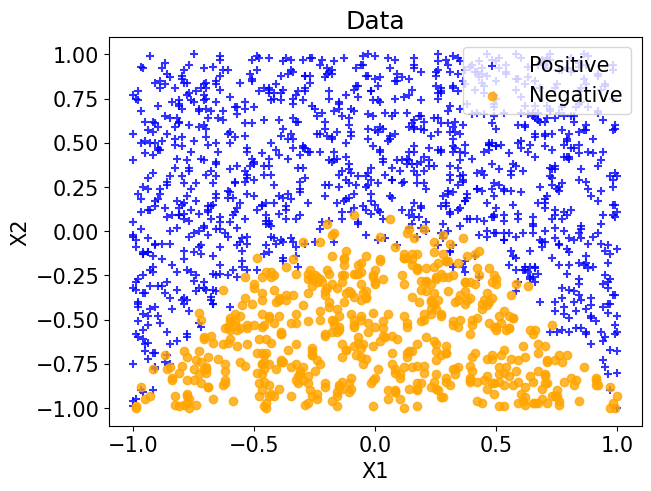

In [724]:
plt.scatter(X1[y == 1], X2[y == 1], marker='+', c='blue', label="Positive", alpha=0.8, edgecolors='w')
plt.scatter(X1[y == -1], X2[y == -1], marker='o', c='orange', label='Negative', alpha=0.8)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data')
plt.legend(loc='upper right')
plt.show()

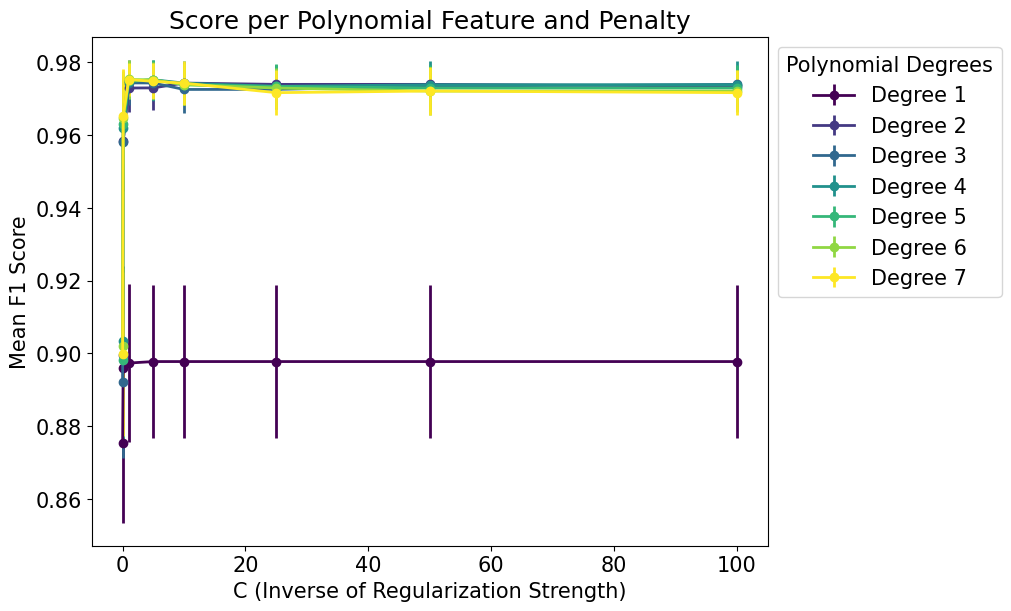

In [725]:
def logisticRegressionKFold(x, y, poly_degrees, C_range, k_fold_value):
    plt.figure(figsize=(10, 6))
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(poly_degrees)))

    for idx, degree in enumerate(poly_degrees):
        mean_error = []
        std_error = []
        x_poly = PolynomialFeatures(degree).fit_transform(x)

        for C in C_range:
            
            LRModel = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000)
            k_fold = KFold(n_splits=k_fold_value, shuffle=True, random_state=42)
            f1_scores = []
            
            for train_index, test_index in k_fold.split(x_poly):

                LRModel.fit(x_poly[train_index], y[train_index])
                y_pred = LRModel.predict(x_poly[test_index])
                f1 = f1_score(y[test_index], y_pred)
                f1_scores.append(f1)
                

            mean_error.append(np.mean(f1_scores))
            std_error.append(np.std(f1_scores))

        plt.errorbar(C_range, mean_error, yerr=std_error, label=f'Degree {degree}',
                     color=colors[idx], fmt='-o', linewidth=2, markersize=6)

    plt.xlabel('C (Inverse of Regularization Strength)')
    plt.ylabel('Mean F1 Score')
    plt.title('Score per Polynomial Feature and Penalty')
    plt.legend(title='Polynomial Degrees', bbox_to_anchor=(1, 1))
    plt.show()
 
# This values I am taking from last assignments according what i have understand    
poly_degree = [1, 2, 3, 4, 5, 6, 7]
C_range = [0.01, 0.1, 1, 5, 10, 25, 50, 100]
k_fold_value = 5
logisticRegressionKFold(X, y, poly_degree, C_range, k_fold_value)

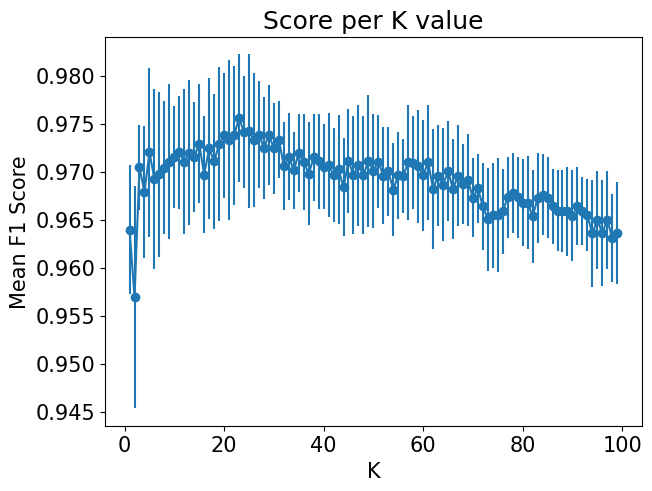

The best value of K is: 23


In [726]:
def knearestNeighborKFold(k_range, x, y, k_fold_value):
    mean_error = []
    std_error = []
    
    for k in k_range:
        model = KNeighborsClassifier(n_neighbors=k)
        k_fold = KFold(n_splits=k_fold_value, shuffle=True, random_state=42)
        f1_scores = []

        for train_index, test_index in k_fold.split(x):
            
            model.fit(x[train_index], y[train_index])
            y_pred = model.predict(x[test_index])
            f1 = f1_score(y[test_index], y_pred)
            f1_scores.append(f1)

        mean_error.append(np.mean(f1_scores))
        std_error.append(np.std(f1_scores))

    plt.errorbar(k_range, mean_error, yerr=std_error, fmt='-o')
    plt.xlabel('K')
    plt.ylabel('Mean F1 Score')
    plt.title('Score per K value')
    plt.show()
    best_k = k_range[np.argmax(mean_error)]
    print(f"The best value of K is: {best_k}")

k_range = np.array(range(1, 100))
k_fold_value = 5
knearestNeighborKFold(k_range, X, y, k_fold_value)

In [727]:
best_degree = 7
best_C = 50
poly = PolynomialFeatures(best_degree)
x_poly = poly.fit_transform(X)
logistic_model = LogisticRegression(penalty='l2', C=best_C, max_iter=1000)

logistic_model.fit(x_poly, y)
y_pred_logistic = logistic_model.predict(x_poly)
conf_matrix_logistic = confusion_matrix(y, y_pred_logistic, labels=[-1, 1])
class_matrix_logistic = classification_report(y, y_pred_logistic)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_logistic)
print("Classification Report for Logistic Regression:")
print(class_matrix_logistic)

Confusion Matrix for Logistic Regression:
[[ 530   28]
 [  25 1089]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       558
           1       0.97      0.98      0.98      1114

    accuracy                           0.97      1672
   macro avg       0.96      0.96      0.96      1672
weighted avg       0.97      0.97      0.97      1672



In [728]:
best_k = 22
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X, y)

y_pred_knn = knn_model.predict(X)
conf_matrix_knn = confusion_matrix(y, y_pred_knn)
class_matrix_knn = classification_report(y, y_pred_knn)

print("\nConfusion Matrix for kNN Classifier:")
print(conf_matrix_knn)
print("Classification Report for kNN Classifier:")
print(class_matrix_knn)


Confusion Matrix for kNN Classifier:
[[ 535   23]
 [  34 1080]]
Classification Report for kNN Classifier:
              precision    recall  f1-score   support

          -1       0.94      0.96      0.95       558
           1       0.98      0.97      0.97      1114

    accuracy                           0.97      1672
   macro avg       0.96      0.96      0.96      1672
weighted avg       0.97      0.97      0.97      1672



In [729]:
random_model = DummyClassifier(strategy="uniform", random_state=42).fit(X, y)
random_predictions = random_model.predict(X)

print("Confusion Matrix for Random Model:\n")
print(confusion_matrix(y, random_predictions))
print("\nClassification Report for Random Model:\n")
print(classification_report(y, random_predictions))

most_frequent_model = DummyClassifier(strategy="most_frequent").fit(X, y)
most_frequent_predictions = most_frequent_model.predict(X)

print("\nConfusion Matrix for Most Frequent Model:\n")
print(confusion_matrix(y, most_frequent_predictions))
print("\nClassification Report for Most Frequent Model:\n")
print(classification_report(y, most_frequent_predictions))

Confusion Matrix for Random Model:

[[265 293]
 [579 535]]

Classification Report for Random Model:

              precision    recall  f1-score   support

          -1       0.31      0.47      0.38       558
           1       0.65      0.48      0.55      1114

    accuracy                           0.48      1672
   macro avg       0.48      0.48      0.46      1672
weighted avg       0.54      0.48      0.49      1672


Confusion Matrix for Most Frequent Model:

[[   0  558]
 [   0 1114]]

Classification Report for Most Frequent Model:

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       558
           1       0.67      1.00      0.80      1114

    accuracy                           0.67      1672
   macro avg       0.33      0.50      0.40      1672
weighted avg       0.44      0.67      0.53      1672



/Users/abhishekzade/Desktop/ML-Assigment/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhishekzade/Desktop/ML-Assigment/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhishekzade/Desktop/ML-Assigment/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

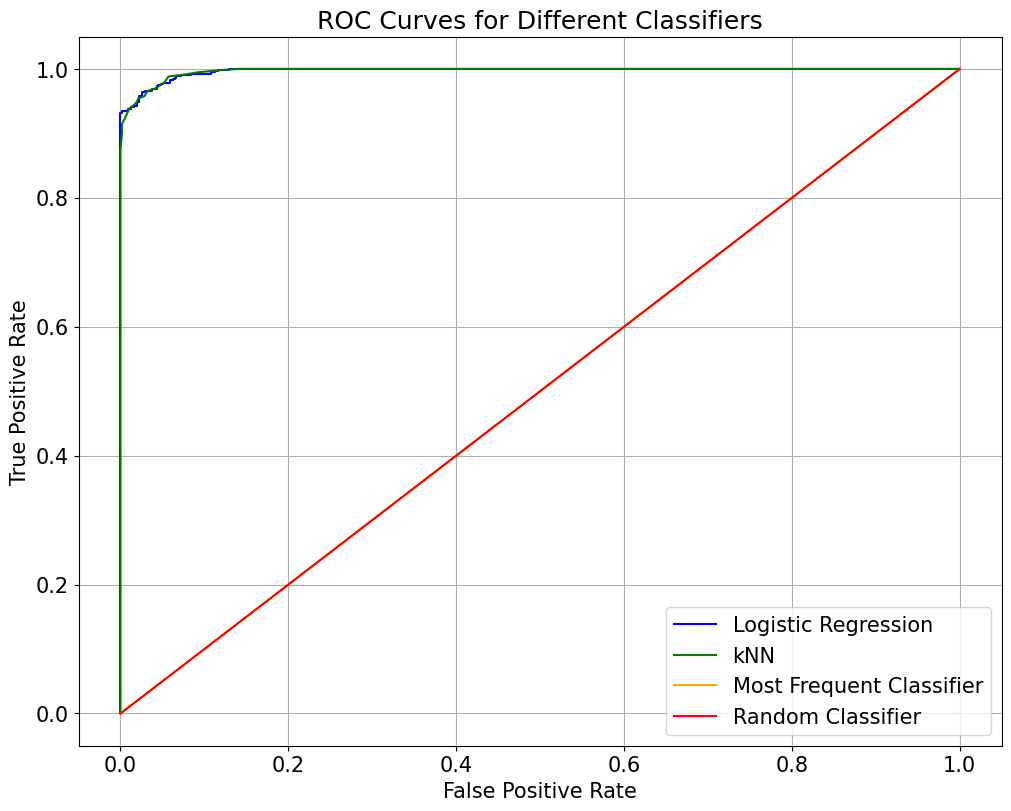

In [730]:
LR_decision_function = logistic_model.decision_function(x_poly)
fpr, tpr, _ = roc_curve(y, LR_decision_function)

knn_probability = knn_model.predict_proba(X)
most_frequent_probability = most_frequent_model.predict_proba(X)
random_probability = random_model.predict_proba(X)

knn_fpr, knn_tpr, _ = roc_curve(y, knn_probability[:, 1])
most_freq_fpr, most_freq_tpr, _ = roc_curve(y, most_frequent_probability[:, 1])
rand_fpr, rand_tpr, _ = roc_curve(y, random_probability[:, 1])

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='Logistic Regression', color='blue')
plt.plot(knn_fpr, knn_tpr, label='kNN', color='green')
plt.plot(most_freq_fpr, most_freq_tpr, label='Most Frequent Classifier', color='orange')
plt.plot(rand_fpr, rand_tpr, label='Random Classifier', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc='lower right')
plt.grid()
plt.show()